In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Used to build and deploy machine learning apps
import tensorflow as tf

# Deep Learning API for creating Neural Networks (Runs on TensorFlow)
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow import math
from tensorflow.keras.utils import plot_model

# Scikit-learn : machine learning library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


Get Wine Data

In [2]:
wine_data = pd.read_csv("/Users/arsencameron/Documents/Projects/wine-master/winequality.csv")
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Data Cleaning

In [3]:
wine_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
# Remove all null data
wine_data = wine_data.dropna()
wine_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Rename "type" column to "white_wine"
wine_data.rename(columns={"type": "white_wine"}, inplace=True)
wine_data

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
# Set white to 1 and red to 0 as we only want numerical data
wine_data.loc[wine_data["white_wine"] == "white", "white_wine"] = 1
wine_data.loc[wine_data["white_wine"] == "red", "white_wine"] = 0
wine_data.head()

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Set bad wine (quality <= 6) to 0 and good wine (quality >= 7) to 1
wine_data.loc[wine_data["quality"] <= 6, "quality"] = 0
wine_data.loc[wine_data["quality"] >= 7, "quality"] = 1
(wine_data["quality"] == 1).sum() # Number of good wines

1271

In [8]:
# Normalizing data, i.e. converting non-numerical data into numbers and putting values on the same scale
ct = make_column_transformer(
    (MinMaxScaler(), ["fixed acidity", "volatile acidity", "citric acid",
     "residual sugar", "chlorides", "free sulfur dioxide",
     "total sulfur dioxide", "density", "pH", "sulphates",
     "alcohol"])
)

In [9]:
# Seperate features and labels
X = wine_data.drop("quality", axis=1) # features
y = wine_data["quality"] # label
X

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Training and test data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=66)

In [11]:
# Transform training and test data
ct.fit(X_train)
X_train_normal = ct.transform(X_train) 
X_test_normal = ct.transform(X_test) 
X_train_normal

array([[0.21487603, 0.11333333, 0.22289157, ..., 0.34645669, 0.1011236 ,
        0.44927536],
       [0.23966942, 0.12666667, 0.18674699, ..., 0.40944882, 0.19101124,
        0.23188406],
       [0.63636364, 0.15333333, 0.30722892, ..., 0.22834646, 0.3988764 ,
        0.26086957],
       ...,
       [0.27272727, 0.12      , 0.20481928, ..., 0.25984252, 0.1741573 ,
        0.15942029],
       [0.18181818, 0.08      , 0.14457831, ..., 0.4488189 , 0.14044944,
        0.50724638],
       [0.30578512, 0.07333333, 0.20481928, ..., 0.28346457, 0.15168539,
        0.44927536]])

Build model

In [12]:
tf.random.set_seed(66)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history = model_1.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.8064 - loss: 0.8611
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.8064 - loss: 0.4563
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.8064 - loss: 0.4333
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.8059 - loss: 0.4174
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.8058 - loss: 0.4066
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.8059 - loss: 0.4024
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.8032 - loss: 0.3999
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.8055 - loss: 0.3974
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.8093 - loss: 0.3961
Epoch 10/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.8108 - loss: 0.3951
Epoch 11/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.8139 - loss: 0.3942
Epoch 12/100
162/16

In [13]:
model_1.evaluate(X_train_normal, y_train)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step - accuracy: 0.8128 - loss: 0.4002


[0.3808341920375824, 0.8247582316398621]

Correlation matrix

<Axes: >

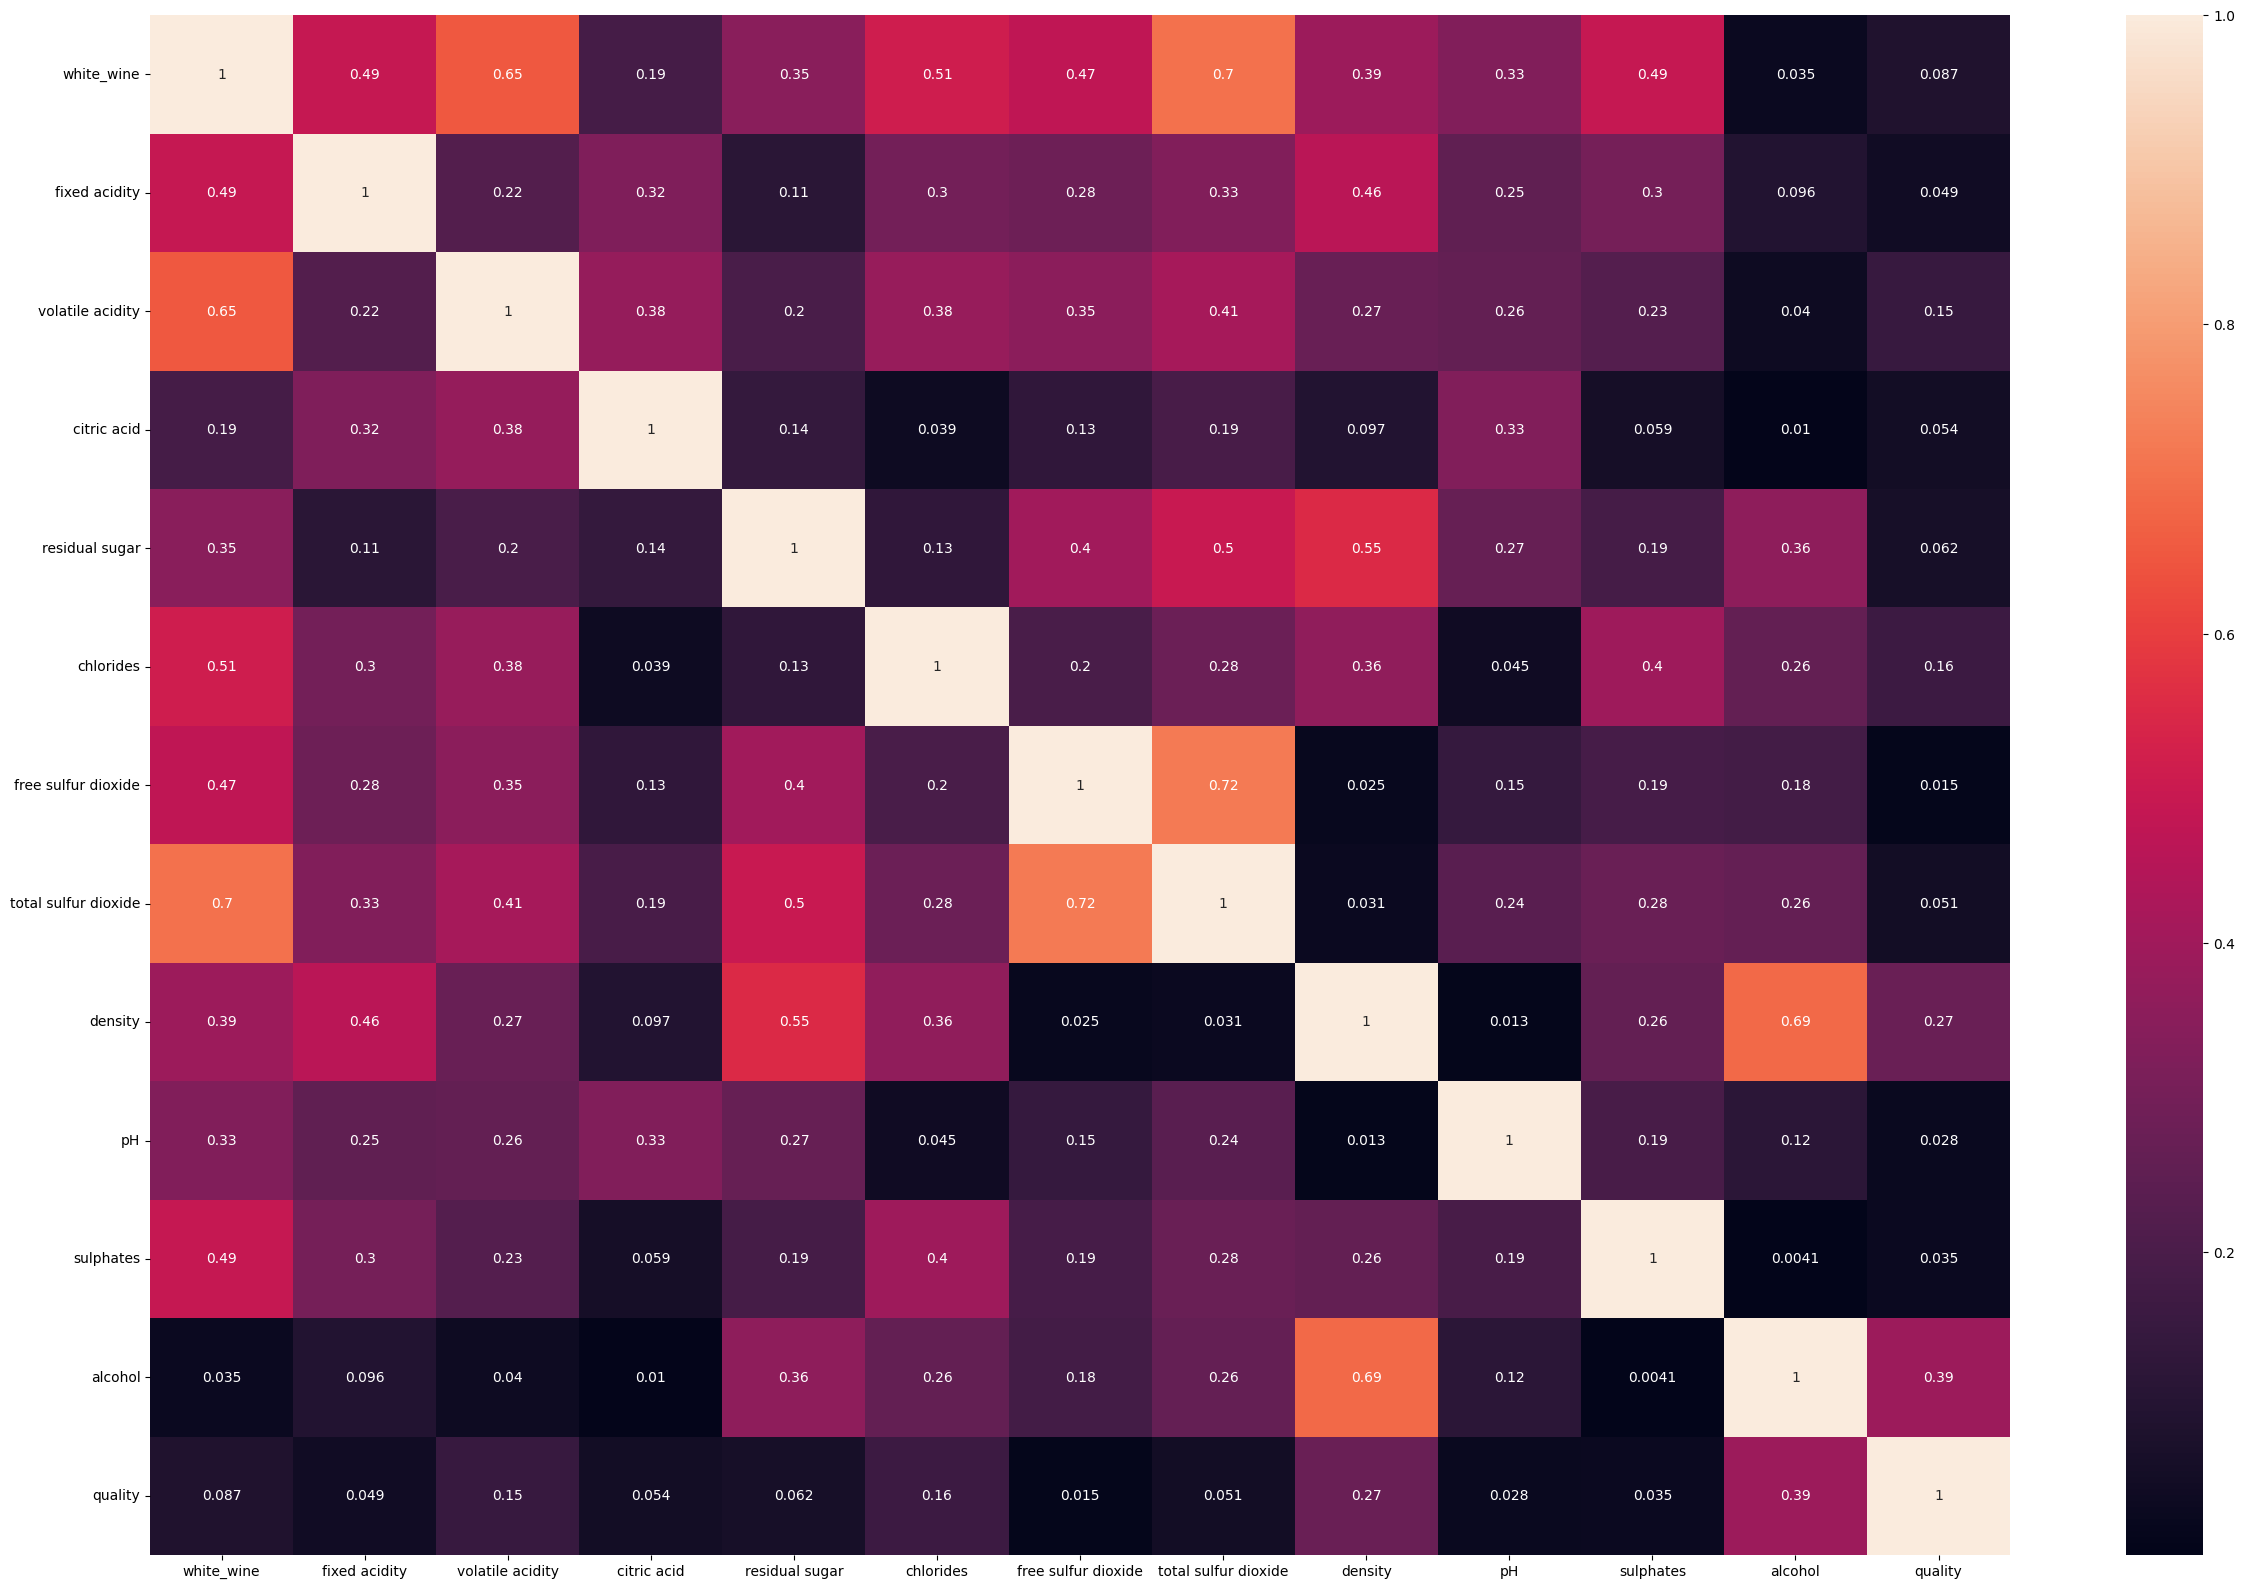

In [14]:
plt.figure(figsize=(30, 20))
sns.heatmap(wine_data.corr().abs(), annot=True)

Plot loss curve

Text(0.5, 1.0, 'Model 1 Loss Curve')

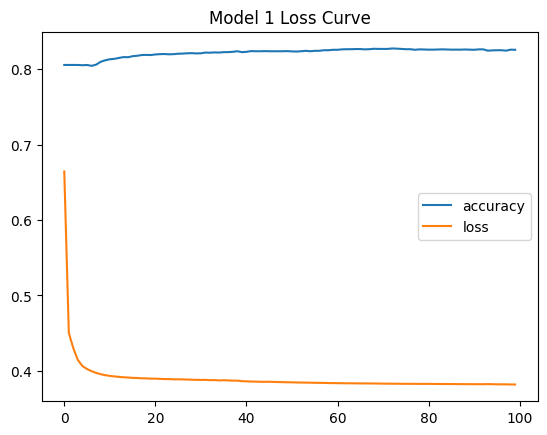

In [15]:
pd.DataFrame(history.history).plot()
plt.title("Model 1 Loss Curve")

Finding ideal learning rate

In [16]:
# Create model to fit on the training data and test on testing data
tf.random.set_seed(66)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

# The callback works during model training
# At each epoch if we change the learning rate and the 
# schedular is going to give Adam the updated learning rate

# The learning rate starts at 1e-4 (.0001) and after each epoch 
# increase the learning rate 10^(epoch/20)
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_lr = model_2.fit(X_train_normal, y_train, 
epochs=100,
callbacks=[scheduler]) # You can have multiple callbacks

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.5572 - loss: 0.6860 - learning_rate: 1.0000e-04
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.8056 - loss: 0.6443 - learning_rate: 1.1220e-04
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.8064 - loss: 0.5977 - learning_rate: 1.2589e-04
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.8064 - loss: 0.5539 - learning_rate: 1.4125e-04
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.8064 - loss: 0.5220 - learning_rate: 1.5849e-04
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.8064 - loss: 0.5038 - learning_rate: 1.7783e-04
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.8064 - loss: 0.4949 - learning_rate: 1.9953e-04
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.8064 - loss: 0.4902 - learning_rate: 2.2387e-04
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accurac

Plot learning rate vs loss

Text(0.5, 1.0, 'learning rate vs loss')

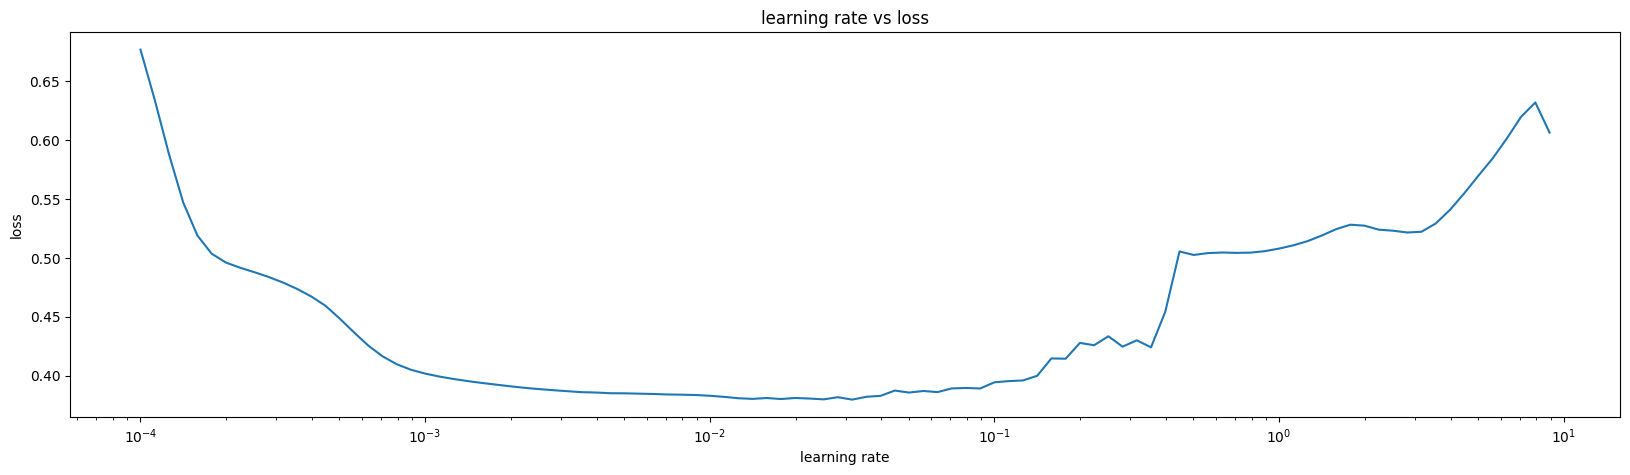

In [17]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(20,5))
plt.semilogx(lrs, history_lr.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

^ Optimum learning rate for least loss is around 10^-2

Build model with ideal learning rate

In [36]:
tf.random.set_seed(66)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

history = model_3.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.8063 - loss: 0.5426
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.8091 - loss: 0.4076
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.8106 - loss: 0.4061
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8183 - loss: 0.4016
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.8113 - loss: 0.4007
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.8132 - loss: 0.3983
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.8163 - loss: 0.3958
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.8141 - loss: 0.3981
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.8156 - loss: 0.3986
Epoch 10/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.8192 - loss: 0.3966
Epoch 11/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.8183 - loss: 0.3953
Epoch 12/100
162/16

Evaluate with test data

In [37]:
loss, acc = model_3.evaluate(X_test_normal, y_test)
print(f"Model Loss (Test Set): {loss}")
print(f"Model Accuracy (Test Set): {acc}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - accuracy: 0.8034 - loss: 0.4277
Model Loss (Test Set): 0.41880321502685547
Model Accuracy (Test Set): 0.8043310046195984


Understanding the model

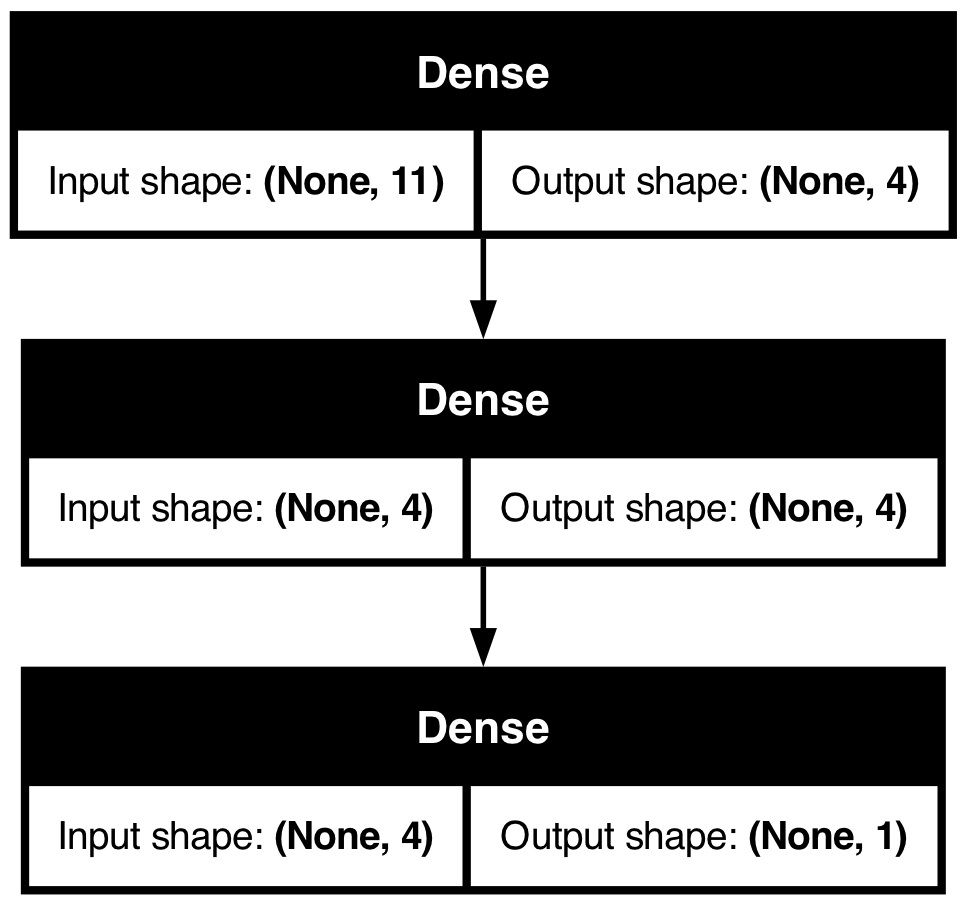

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes=True)

In [39]:
weights, biases = model_3.layers[1].get_weights()
weights, weights.shape

(array([[-1.4188542 , -1.4474916 , -0.7498399 ,  0.18133965],
        [-1.1211078 ,  0.43238205, -0.03349619,  0.57681054],
        [ 1.2092781 , -1.7908933 , -0.23455803, -0.16200672],
        [ 0.5765964 ,  0.02869388, -0.29954568, -1.289526  ]],
       dtype=float32),
 (4, 4))

In [40]:
biases, biases.shape

(array([-0.39459595, -0.7605871 , -0.20616177, -0.22509725], dtype=float32),
 (4,))

In [43]:
model_3.save("model.keras")